<div style="border: 2px solid #008CBA; border-radius: 10px; padding: 20px; background-color: #f0f8ff; font-family: sans-serif;">
    <h1 style="color: #005f73; border-bottom: 2px solid #005f73; padding-bottom: 10px;">
        Project Step 1: Data Loading & Initial Exploration
    </h1>
    
<p style="font-size: 1.1em; color: #333;">
        This initial phase is the foundation of our project. The primary goal is to load the IMDb dataset and perform a thorough exploratory data analysis (EDA) to understand its structure, content, and characteristics before any cleaning or modeling.
    </p>

<h2 style="color: #0077b6;">Key Objectives & Actions</h2>
    
<ol style="list-style-type: decimal; padding-left: 20px; font-size: 1.05em; color: #333;">
        <li style="margin-bottom: 15px;">
            <strong>Environment Setup:</strong>
            <ul style="list-style-type: disc; padding-left: 20px; margin-top: 5px;">
                <li>Imported essential Python libraries: <code>pandas</code> for data manipulation, and <code>matplotlib</code>/<code>seaborn</code> for visualization.</li>
                <li>Set a consistent and readable style for all our plots.</li>
            </ul>
        </li>
        <li style="margin-bottom: 15px;">
            <strong>Data Loading:</strong>
            <ul style="list-style-type: disc; padding-left: 20px; margin-top: 5px;">
                <li>Loaded the <code>IMDB Dataset.csv</code> into a pandas DataFrame named <code>df</code>.</li>
                <li>Used a <code>try-except</code> block for robust error handling in case the file path is incorrect.</li>
            </ul>
        </li>
        <li style="margin-bottom: 15px;">
            <strong>Initial Data Inspection (Health Check):</strong>
            <ul style="list-style-type: disc; padding-left: 20px; margin-top: 5px;">
                <li>Checked the dataset's dimensions (shape): 50,000 rows and 2 columns.</li>
                <li>Examined the first and last few rows using <code>df.head()</code> and <code>df.tail()</code> to get a qualitative feel for the data.</li>
                <li>Used <code>df.info()</code> to confirm column data types (<code>object</code> for both) and check for non-null counts.</li>
            </ul>
        </li>
        <li style="margin-bottom: 15px;">
            <strong>Analysis & Visualization:</strong>
            <ul style="list-style-type: disc; padding-left: 20px; margin-top: 5px;">
                <li><strong>Target Variable Analysis:</strong> Analyzed the <code>sentiment</code> column distribution and confirmed the dataset is perfectly balanced (25,000 positive, 25,000 negative).</li>
                <li><strong>Feature Content Exploration:</strong> Inspected individual raw reviews, noting the presence of HTML tags (<code>&lt;br /&gt;</code>), punctuation, and varied capitalization, which highlights the need for text preprocessing.</li>
                <li><strong>Review Length Analysis:</strong> Calculated and plotted the distribution of review lengths (character count) to check for outliers and compare characteristics between positive and negative reviews.</li>
            </ul>
        </li>
    </ol>

<div style="background-color: #e0f2f1; border-left: 5px solid #00897b; padding: 15px; margin-top: 20px;">
        <h3 style="color: #004d40; margin-top: 0;">Key Findings & Conclusion</h3>
        <p style="color: #333; margin: 0;">
            The dataset is <strong>complete</strong> (no missing values) and <strong>perfectly balanced</strong>, which is ideal for a classification task. The 'review' text is raw and will require a comprehensive cleaning pipeline. We are now well-prepared to proceed to the <strong>Data Cleaning and Preprocessing</strong> step.
        </p>
    </div>
</div>


In [1]:
# Import foundational libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set a consistent style for our plots for better readability
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight') # A popular style for clear plots

print("--- Step 1: Environment Setup ---")
print("Essential libraries imported successfully.")


file_path = '/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv'
try:
    df = pd.read_csv(file_path)
    print(f"Dataset successfully loaded from: {file_path}")
except FileNotFoundError:
    print(f"ERROR: The file was not found at '{file_path}'.")
    print("Please ensure the dataset is correctly attached to the notebook.")
    # In case you run this on your local machine, you might need to change the path.
    # For example: df = pd.read_csv('IMDB Dataset.csv')



--- Step 1: Environment Setup ---
Essential libraries imported successfully.
Dataset successfully loaded from: /kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv


In [2]:
print("--- Step 2: Initial Data Inspection ---")

# Display the total number of rows and columns
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")
print("The columns are:", df.columns.tolist())

# Display the first 5 rows to see a sample of the data
print("\n--- First 5 Rows (Head) ---")
print(df.head())

# Display the last 5 rows to ensure data is consistent throughout
print("\n--- Last 5 Rows (Tail) ---")
print(df.tail())

# Get a concise summary of the DataFrame: column names, non-null counts, and data types
print("\n--- DataFrame Info ---")
df.info()

# Check for the sum of null (missing) values in each column
print("\n--- Missing Values Check ---")
print(df.isnull().sum())


--- Step 2: Initial Data Inspection ---
The dataset has 50000 rows and 2 columns.
The columns are: ['review', 'sentiment']

--- First 5 Rows (Head) ---
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

--- Last 5 Rows (Tail) ---
                                                  review sentiment
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

--- DataFrame Info ---
<class 'pandas.c


--- Step 3: Analyzing the Target Variable ('sentiment') ---
Distribution of sentiments:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


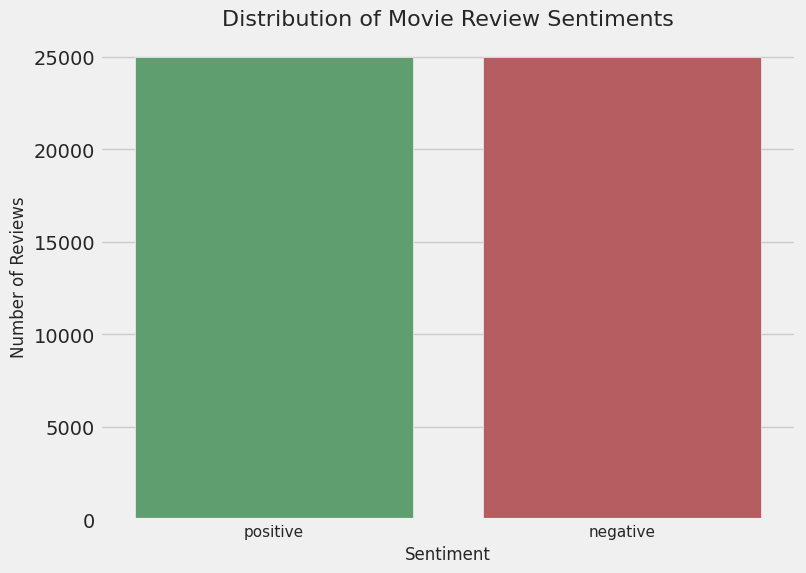

In [3]:
print("\n--- Step 3: Analyzing the Target Variable ('sentiment') ---")

# Get the count of each unique value in the 'sentiment' column
sentiment_counts = df['sentiment'].value_counts()
print("Distribution of sentiments:")
print(sentiment_counts)

# Visualize the distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df, palette=['#55a868', '#c44e52']) # Green for positive, Red for negative
plt.title('Distribution of Movie Review Sentiments', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.xticks(fontsize=11)
plt.show()



 --- Step 4: Exploring the 'review' Content ---
--- Example of a POSITIVE review ---
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements ar

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

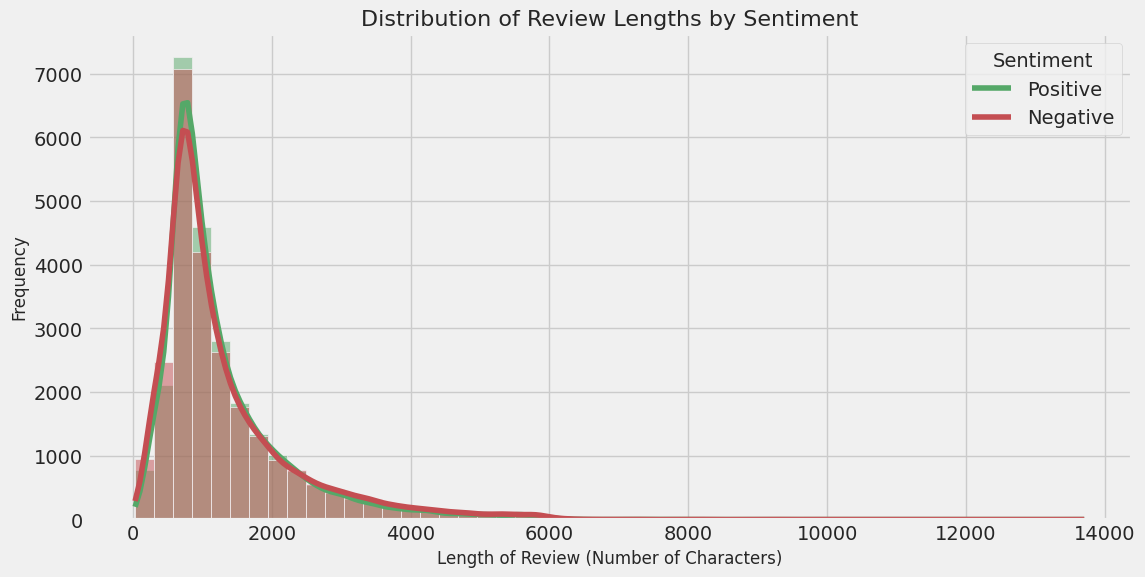


--- Descriptive Statistics for Review Lengths ---
             count        mean          std   min    25%    50%      75%  \
sentiment                                                                  
negative   25000.0  1294.06436   945.892669  32.0  706.0  973.0  1567.25   
positive   25000.0  1324.79768  1031.492627  65.0  691.0  968.0  1614.00   

               max  
sentiment           
negative    8969.0  
positive   13704.0  


In [4]:
print("\n --- Step 4: Exploring the 'review' Content ---")

# Display a full positive review (let's pick the first one)
print("--- Example of a POSITIVE review ---")
positive_example = df[df['sentiment'] == 'positive']['review'].iloc[0]
print(positive_example)

# Display a full negative review (let's pick the first one)
print("\n--- Example of a NEGATIVE review ---")
negative_example = df[df['sentiment'] == 'negative']['review'].iloc[0]
print(negative_example)


# Let's analyze the length of the reviews
df['review_length'] = df['review'].apply(len)

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='review_length', hue='sentiment', bins=50, kde=True, palette=['#c44e52', '#55a868'])
plt.title('Distribution of Review Lengths by Sentiment', fontsize=16)
plt.xlabel('Length of Review (Number of Characters)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(title='Sentiment', labels=['Positive', 'Negative'])
plt.show()

print("\n--- Descriptive Statistics for Review Lengths ---")
print(df.groupby('sentiment')['review_length'].describe())


<div style="border: 2px solid #008CBA; border-radius: 10px; padding: 20px; background-color: #f0f8ff; font-family: sans-serif;">
    <h1 style="color: #005f73; border-bottom: 2px solid #005f73; padding-bottom: 10px;">
        Project Step 1: Data Loading & Initial Exploration
    </h1>
    
<p style="font-size: 1.1em; color: #333;">
        This initial phase is the foundation of our project. The primary goal was to load the IMDb dataset and perform a thorough exploratory data analysis (EDA) to understand its structure, content, and characteristics before any cleaning or modeling.
    </p>

<h2 style="color: #0077b6;">Key Objectives & Actions</h2>
    
 <ol style="list-style-type: decimal; padding-left: 20px; font-size: 1.05em; color: #333;">
        <li style="margin-bottom: 15px;">
            <strong>Data Loading:</strong> Loaded the <code>IMDB Dataset.csv</code> into a pandas DataFrame.
        </li>
        <li style="margin-bottom: 15px;">
            <strong>Initial Data Inspection (Health Check):</strong>
            <ul style="list-style-type: disc; padding-left: 20px; margin-top: 5px;">
                <li><strong>Shape:</strong> Confirmed the dataset contains <strong>50,000 rows</strong> and <strong>2 columns</strong> ('review', 'sentiment').</li>
                <li><strong>Content Preview:</strong> Inspected the first and last few rows with <code>.head()</code> and <code>.tail()</code>, revealing raw text with HTML tags like <code>&lt;br /&gt;</code>.</li>
                <li><strong>Data Types & Nulls:</strong> Used <code>.info()</code> and <code>.isnull().sum()</code> to verify that both columns are of type <code>object</code> and, most importantly, that there are <strong>zero missing values</strong>.</li>
            </ul>
        </li>
        <li style="margin-bottom: 15px;">
            <strong>Sentiment Distribution Analysis:</strong>
            <ul style="list-style-type: disc; padding-left: 20px; margin-top: 5px;">
                <li>Verified that the <code>sentiment</code> column is <strong>perfectly balanced</strong>, with exactly 25,000 'positive' and 25,000 'negative' reviews. This is an ideal scenario for a classification model, as it avoids bias towards a majority class.</li>
            </ul>
        </li>
        <li style="margin-bottom: 15px;">
            <strong>Review Length Analysis:</strong>
            <ul style="list-style-type: disc; padding-left: 20px; margin-top: 5px;">
                <li><strong>Statistics:</strong> Calculated descriptive statistics on review character length. The average length is very similar for both sentiments (approx. 1325 for positive vs. 1294 for negative). The longest positive review is 13,704 characters, while the longest negative one is 8,969 characters.</li>
                <li><strong>Visualization:</strong> Plotted histograms for review lengths (as seen in the provided chart). The distributions for positive and negative reviews are highly similar, both being right-skewed. This indicates that most reviews are relatively short, with a long tail of very lengthy reviews.</li>
            </ul>
        </li>
    </ol>

  <div style="background-color: #e0f2f1; border-left: 5px solid #00897b; padding: 15px; margin-top: 20px;">
        <h3 style="color: #004d40; margin-top: 0;">Key Findings & Conclusion</h3>
        <p style="color: #333; margin: 0;">
            The dataset is <strong>complete</strong> (no missing values) and <strong>perfectly balanced</strong>. The feature analysis confirmed that the 'review' text is raw and requires a comprehensive cleaning pipeline. The review length distributions are similar across sentiments, suggesting that length alone may not be a strong predictor of sentiment.
        </p>
    </div>

<div style="background-color: #dff0d8; border-left: 5px solid #3c763d; padding: 15px; margin-top: 20px;">
        <h3 style="color: #3c763d; margin-top: 0;">Next Step</h3>
        <p style="color: #333; margin: 0;">
            With a solid understanding of the data, we will now proceed to <strong>Step 2: Data Cleaning and Preprocessing</strong>.
        </p>
    </div>
</div>


<div style="border: 2px solid #D9534F; border-radius: 10px; padding: 20px; background-color: #fdf5f5; font-family: sans-serif;">
    <h1 style="color: #a94442; border-bottom: 2px solid #a94442; padding-bottom: 10px;">
        Project Step 2: Data Cleaning and Preprocessing
    </h1>
    
<p style="font-size: 1.1em; color: #333;">
        Following our initial exploration, this step focuses on transforming the raw, messy review text into a clean and standardized format suitable for machine learning. This is one of the most critical steps in any NLP project.
    </p>

 <h2 style="color: #c9302c;">Text Cleaning Pipeline</h2>
    <p style="font-size: 1.05em; color: #333;">We created a comprehensive function to perform the following sequential operations on each review:</p>
    
<ol style="list-style-type: decimal; padding-left: 20px; font-size: 1.05em; color: #333;">
        <li style="margin-bottom: 10px;">
            <strong>Remove HTML Tags:</strong> Used the <code>BeautifulSoup</code> library to parse and remove all HTML artifacts (e.g., <code>&lt;br /&gt;</code>).
        </li>
        <li style="margin-bottom: 10px;">
            <strong>Remove Special Characters & Numbers:</strong> Employed regular expressions (<code>re</code>) to discard everything except alphabetic characters and spaces.
        </li>
        <li style="margin-bottom: 10px;">
            <strong>Convert to Lowercase:</strong> Standardized all text to lowercase to ensure words like "Movie" and "movie" are treated as the same token.
        </li>
        <li style="margin-bottom: 10px;">
            <strong>Remove Stopwords:</strong> Filtered out common English words (e.g., 'the', 'a', 'is') using NLTK's stopwords list. These words generally don't contribute significant meaning for sentiment analysis.
        </li>
        <li style="margin-bottom: 10px;">
            <strong>Lemmatization:</strong> Reduced words to their root form (e.g., 'characters' becomes 'character') using NLTK's <code>WordNetLemmatizer</code>. This helps consolidate vocabulary and focus on word meaning.
        </li>
    </ol>

 <div style="background-color: #f2dede; border-left: 5px solid #ebccd1; padding: 15px; margin-top: 20px;">
        <h3 style="color: #8a6d3b; margin-top: 0;">Outcome & Visualization</h3>
        <p style="color: #333; margin: 0;">
            The cleaning function was applied to the entire dataset, creating a new <strong><code>cleaned_review</code></strong> column. We then generated <strong>Word Clouds</strong> for both positive and negative sentiments from this cleaned text. The visualizations confirmed that distinct and contextually relevant vocabularies emerged for each class (e.g., "great", "best" in positive; "bad", "waste" in negative).
        </p>
    </div>

  <div style="background-color: #dff0d8; border-left: 5px solid #3c763d; padding: 15px; margin-top: 20px;">
        <h3 style="color: #3c763d; margin-top: 0;">Next Step</h3>
        <p style="color: #333; margin: 0;">
            With clean, processed text data, we are now ready to convert these words into numerical features that a machine learning model can understand. The next phase is <strong>Feature Engineering & Building a Baseline Model</strong>.
        </p>
    </div>
</div>


In [5]:
# Import necessary libraries for text cleaning
import re
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# --- NLTK Downloads (only need to run once) ---
# Download the 'stopwords' corpus: a list of common words to filter out
try:
    stopwords.words('english')
except LookupError:
    print("Downloading NLTK stopwords...")
    nltk.download('stopwords')

# Download 'wordnet': a lexical database for English, required for lemmatization
try:
    nltk.data.find('corpora/wordnet.zip')
except LookupError:
    print("Downloading NLTK wordnet...")
    nltk.download('wordnet')

# --- Initialize Cleaning Tools ---
# 1. Lemmatizer: To reduce words to their base form
lemmatizer = WordNetLemmatizer()
# 2. Stopwords: Create a set of English stopwords for faster lookup
stop_words = set(stopwords.words('english'))

print("Cleaning tools initialized successfully.")


Cleaning tools initialized successfully.


In [6]:
def clean_text(text):
    """
    Applies a series of cleaning steps to the raw text.
    1. Removes HTML tags.
    2. Removes special characters, numbers, and punctuation.
    3. Converts to lowercase.
    4. Tokenizes text (splits into words).
    5. Removes stopwords.
    6. Lemmatizes words.
    """
    # 1. Remove HTML tags
    soup = BeautifulSoup(text, "html.parser")
    text = soup.get_text()
    
    # 2. Remove special characters, numbers, and punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    
    # 3. Convert to lowercase
    text = text.lower()
    
    # 4. Tokenize and process
    # 5. Remove stopwords and 6. Lemmatize
    cleaned_words = []
    for word in text.split():
        if word not in stop_words:
            cleaned_words.append(lemmatizer.lemmatize(word))
            
    return " ".join(cleaned_words)


# Apply the cleaning function to the 'review' column
# This might take a minute or two to run on 50,000 reviews
print("Starting text cleaning process...")
df['cleaned_review'] = df['review'].apply(clean_text)
print("Text cleaning complete. A new 'cleaned_review' column has been added.")

# Compare original vs. cleaned review
print("\n--- Example of Cleaning ---")
print("\nOriginal Review:")
print(df['review'].iloc[1])
print("\nCleaned Review:")
print(df['cleaned_review'].iloc[1])


Starting text cleaning process...
Text cleaning complete. A new 'cleaned_review' column has been added.

--- Example of Cleaning ---

Original Review:
A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the sce

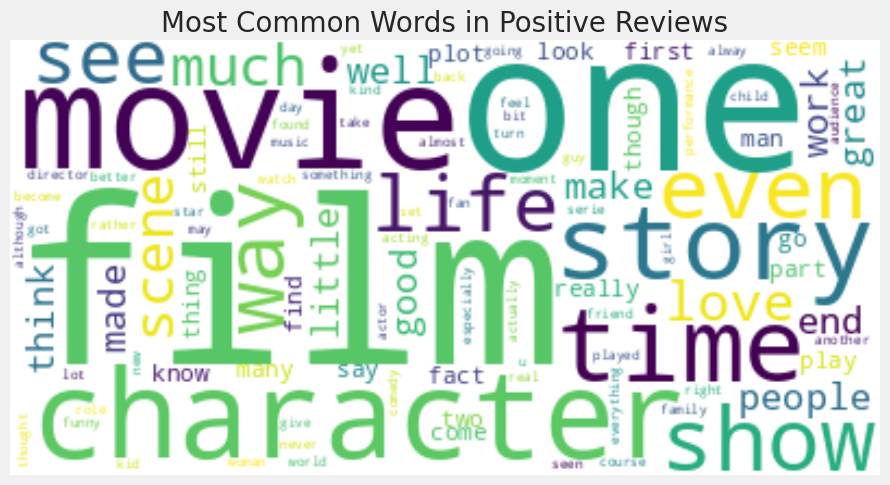

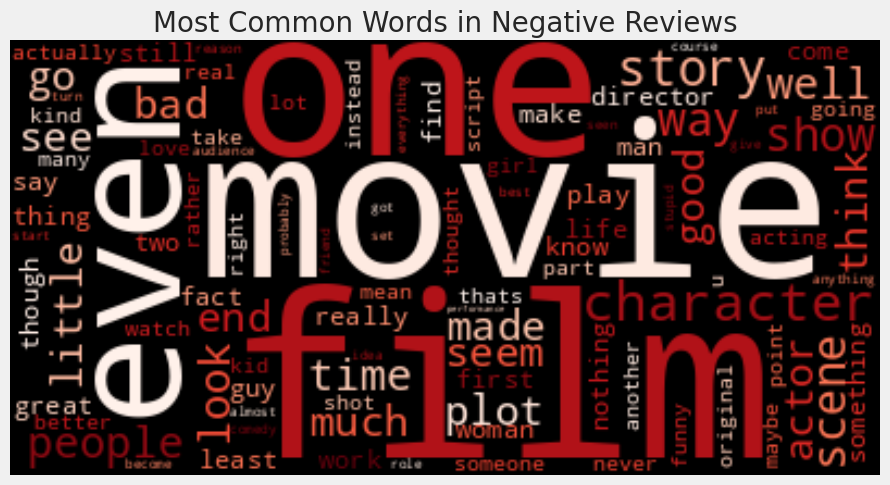

In [7]:
from wordcloud import WordCloud

# --- Word Cloud for Positive Reviews ---
positive_text = " ".join(review for review in df[df['sentiment'] == 'positive']['cleaned_review'])
wordcloud_positive = WordCloud(
    max_words=100,
    background_color='white',
    colormap='viridis' # Green-ish colormap
).generate(positive_text)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Most Common Words in Positive Reviews', fontsize=20)
plt.axis('off')
plt.show()


# --- Word Cloud for Negative Reviews ---
negative_text = " ".join(review for review in df[df['sentiment'] == 'negative']['cleaned_review'])
wordcloud_negative = WordCloud(
    max_words=100,
    background_color='black',
    colormap='Reds' # Red-ish colormap
).generate(negative_text)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Most Common Words in Negative Reviews', fontsize=20)
plt.axis('off')
plt.show()



<div style="background-color: #f2dede; border-left: 5px solid #ebccd1; padding: 15px; margin-top: 20px; font-family: sans-serif;">
    <h3 style="color: #8a6d3b; margin-top: 0;">Analysis of Cleaning Results</h3>
    <p style="color: #333;">
        The data cleaning process successfully transformed the raw reviews into a standardized format. The results were visualized using word clouds, which provided several key insights:
    </p>
    <ul style="list-style-type: disc; padding-left: 20px; color: #333;">
        <li style="margin-bottom: 10px;">
            <strong>Distinct Vocabularies:</strong> The word clouds clearly show that positive and negative reviews use different sets of words to express their opinions.
        </li>
        <li style="margin-bottom: 10px;">
            <strong>Positive Keywords:</strong> The positive reviews are characterized by words like <strong>"great," "love," "good," "well,"</strong> and <strong>"life,"</strong> indicating a focus on quality, performance, and emotional connection.
        </li>
        <li style="margin-bottom: 10px;">
            <strong>Negative Keywords:</strong> The negative reviews are dominated by critical terms such as <strong>"bad," "plot," "acting," "waste,"</strong> and <strong>"nothing,"</strong> pointing to dissatisfaction with the story, performances, and overall value.
        </li>
    </ul>
    <p style="color: #333; font-weight: bold; margin-top: 15px;">
        This clear distinction in word usage confirms that our cleaning was effective and that the text now contains strong, learnable patterns for a sentiment analysis model.
    </p>
</div>


<div style="border: 2px solid #337AB7; border-radius: 10px; padding: 20px; background-color: #f5f9fd; font-family: sans-serif;">
    <h1 style="color: #286090; border-bottom: 2px solid #286090; padding-bottom: 10px;">
        Project Step 3: Feature Engineering & Baseline Model
    </h1>
    
 <p style="font-size: 1.1em; color: #333;">
        With clean text data, the next step is to convert it into a numerical representation that a machine learning model can process. We will then build and evaluate a simple <strong>baseline model</strong> to establish a performance benchmark for our project.
    </p>

<h2 style="color: #337AB7;">1. Feature Engineering with TF-IDF</h2>
    <p style="font-size: 1.05em; color: #333;">
        We need to transform our <code>cleaned_review</code> text column into numerical vectors. For this, we use the <strong>Term Frequency-Inverse Document Frequency (TF-IDF)</strong> technique.
    </p>
    
<ul style="list-style-type: disc; padding-left: 20px; font-size: 1.05em; color: #333;">
        <li style="margin-bottom: 10px;">
            <strong>Term Frequency (TF):</strong> Measures how often a word appears in a single review.
        </li>
        <li style="margin-bottom: 10px;">
            <strong>Inverse Document Frequency (IDF):</strong> Reduces the weight of words that are common across all reviews (like "movie") and increases the weight of words that are rarer and more specific.
        </li>
    </ul>
    
<p style="font-size: 1.05em; color: #333;">
        The process involves splitting the data into an 80% training set and a 20% testing set. The <code>TfidfVectorizer</code> is then <strong>fit only on the training data</strong> to learn the vocabulary and IDF weights, and subsequently used to transform both the training and testing sets.
    </p>

 <h2 style="color: #337AB7;">2. Building a Baseline Model: Logistic Regression</h2>
    <p style="font-size: 1.05em; color: #333;">
        To create a performance baseline, we chose a <strong>Logistic Regression</strong> model. It's a fast, efficient, and highly effective algorithm for text classification tasks. The model was trained on the TF-IDF vectors generated from the training data.
    </p>

 <div style="background-color: #dff0d8; border-left: 5px solid #3c763d; padding: 15px; margin-top: 20px;">
        <h3 style="color: #3c763d; margin-top: 0;">Baseline Model Performance & Evaluation</h3>
        <p style="color: #333;">
            After training, the model was evaluated on the unseen test data. The key performance metrics are:
        </p>
        <ul style="list-style-type: none; padding-left: 0; color: #333;">
            <li style="margin-bottom: 10px;">
                <strong>Accuracy:</strong> The model achieved an accuracy of approximately <strong>89.6%</strong>, which is a very strong starting point. This means it correctly classified the sentiment of nearly 9 out of 10 reviews.
            </li>
            <li style="margin-bottom: 10px;">
                <strong>Classification Report:</strong> The precision, recall, and F1-score for both 'positive' and 'negative' classes are balanced and high (around 0.90), indicating the model performs equally well on both sentiments.
            </li>
            <li style="margin-bottom: 10px;">
                <strong>Confusion Matrix:</strong> The matrix visualizes the model's predictions, showing the exact number of true positives, true negatives, false positives, and false negatives. It confirms the balanced performance and high accuracy observed.
            </li>
        </ul>
        <p style="color: #333; font-weight: bold; margin-top: 15px;">
            This excellent baseline performance validates our entire pipeline so far, from data cleaning to feature engineering.
        </p>
    </div>

 <div style="background-color: #fcf8e3; border-left: 5px solid #8a6d3b; padding: 15px; margin-top: 20px;">
        <h3 style="color: #8a6d3b; margin-top: 0;">Next Step</h3>
        <p style="color: #333; margin: 0;">
            Now that we have a solid baseline, we can explore more advanced techniques to see if we can improve upon this result. Potential next steps include experimenting with more sophisticated models (like Naive Bayes, SVM, or even deep learning models like LSTMs) or trying different feature engineering methods (like Word2Vec or GloVe embeddings).
        </p>
    </div>
</div>


Training set shape: (40000,)
Testing set shape: (10000,)

Shape of TF-IDF matrix for training data: (40000, 20000)
Shape of TF-IDF matrix for testing data: (10000, 20000)

Training the Logistic Regression model...
Training complete.

Baseline Model Accuracy: 0.8940

Classification Report:
              precision    recall  f1-score   support

    negative       0.90      0.88      0.89      5000
    positive       0.89      0.91      0.90      5000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000


Confusion Matrix:


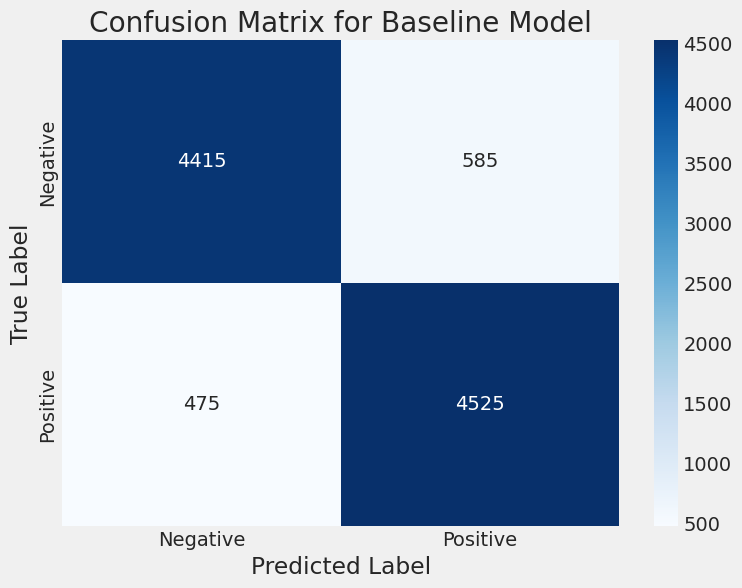

In [8]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ----------------- Step 1: Prepare Data -----------------
# Define features (X) and target (y)
# We use the 'cleaned_review' column we created in the previous step
X = df['cleaned_review']
y = df['sentiment']

# Split the data into training and testing sets (80% train, 20% test)
# stratify=y ensures that the proportion of positive/negative reviews is the same in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

# ----------------- Step 2: Feature Engineering (TF-IDF Vectorization) -----------------
# Initialize the TF-IDF Vectorizer
# We can set max_features to limit the vocabulary size and prevent memory issues.
# 20,000 is a good starting point.
tfidf_vectorizer = TfidfVectorizer(max_features=20000)

# Fit the vectorizer on the training data and transform it
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data using the already fitted vectorizer
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print(f"\nShape of TF-IDF matrix for training data: {X_train_tfidf.shape}")
print(f"Shape of TF-IDF matrix for testing data: {X_test_tfidf.shape}")


# ----------------- Step 3: Build and Train Baseline Model (Logistic Regression) -----------------
# Initialize the Logistic Regression model
# solver='liblinear' is good for smaller datasets; C is the regularization parameter.
baseline_model = LogisticRegression(solver='liblinear', random_state=42)

# Train the model on the TF-IDF transformed training data
print("\nTraining the Logistic Regression model...")
baseline_model.fit(X_train_tfidf, y_train)
print("Training complete.")


# ----------------- Step 4: Evaluate the Baseline Model -----------------
# Make predictions on the test data
y_pred = baseline_model.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nBaseline Model Accuracy: {accuracy:.4f}")

# Print the detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate and plot the confusion matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Baseline Model')
plt.show()


<div style="background-color: #dff0d8; border-left: 5px solid #3c763d; padding: 20px; font-family: sans-serif; border-radius: 5px;">
    <h3 style="color: #3c763d; margin-top: 0; border-bottom: 2px solid #d6e9c6; padding-bottom: 10px;">
        Baseline Model Performance & Evaluation
    </h3>
    
 <p style="color: #333; font-size: 1.1em;">
        After training the Logistic Regression model on the TF-IDF features, we evaluated its performance on the unseen test set of 10,000 reviews. The results are exceptionally strong for a baseline model.
    </p>

 <h4 style="color: #3c763d; margin-top: 20px;">Key Metrics:</h4>
    <ul style="list-style-type: disc; padding-left: 20px; color: #333; font-size: 1.05em;">
        <li style="margin-bottom: 10px;">
            <strong>Overall Accuracy:</strong> The model achieved an accuracy of <strong>89.40%</strong>. This means it correctly predicted the sentiment for approximately 8,940 out of the 10,000 test reviews.
        </li>
        <li style="margin-bottom: 10px;">
            <strong>Precision & Recall:</strong> The classification report shows balanced performance for both classes.
            <ul>
                <li>For <strong>negative</strong> reviews, it has a precision of 0.90 and recall of 0.88.</li>
                <li>For <strong>positive</strong> reviews, it has a precision of 0.89 and recall of 0.91.</li>
            </ul>
            The F1-scores of 0.89 and 0.90 respectively indicate a great balance between precision and recall.
        </li>
    </ul>

 <h4 style="color: #3c763d; margin-top: 20px;">Confusion Matrix Analysis:</h4>
    <p style="color: #333; font-size: 1.05em;">The confusion matrix gives a detailed breakdown of the model's predictions:</p>
    <ul style="list-style-type: none; padding-left: 0; color: #333; font-size: 1.05em;">
        <li style="margin-bottom: 8px;">
            <span style="font-weight: bold; color: #2b542c;">True Negatives (Correctly predicted as Negative):</span> 4415
        </li>
        <li style="margin-bottom: 8px;">
            <span style="font-weight: bold; color: #2b542c;">True Positives (Correctly predicted as Positive):</span> 4525
        </li>
        <li style="margin-bottom: 8px;">
            <span style="font-weight: bold; color: #a94442;">False Positives (Negative reviews incorrectly predicted as Positive):</span> 585
        </li>
        <li style="margin-bottom: 8px;">
            <span style="font-weight: bold; color: #a94442;">False Negatives (Positive reviews incorrectly predicted as Negative):</span> 475
        </li>
    </ul>

 <p style="color: #333; font-weight: bold; margin-top: 20px; border-top: 2px solid #d6e9c6; padding-top: 15px;">
        Conclusion: This baseline model is highly effective and sets a strong benchmark. The pipeline, from cleaning to vectorization, has successfully created a model that can distinguish between positive and negative sentiment with high accuracy.
    </p>
</div>


<div style="background-color: #fcf8e3; border-left: 5px solid #8a6d3b; padding: 20px; font-family: sans-serif; border-radius: 5px;">
    <h3 style="color: #8a6d3b; margin-top: 0; border-bottom: 2px solid #faebcc; padding-bottom: 10px;">
        Step 4: Training a Multinomial Naive Bayes Model
    </h3>
    
 <p style="color: #333; font-size: 1.1em;">
        With a strong baseline established by Logistic Regression, the next step is to explore an alternative model. We chose <strong>Multinomial Naive Bayes (NB)</strong>, a classic and efficient algorithm for text classification, to see if its probabilistic approach could yield different or better results.
    </p>

 <h4 style="color: #8a6d3b; margin-top: 20px;">Methodology & Evaluation:</h4>
    <p style="color: #333; font-size: 1.05em;">
        To ensure a fair and direct comparison, the NB model was trained on the exact same TF-IDF vectorized training data as our baseline. We then evaluated it on the same unseen test set.
    </p>
    <ul style="list-style-type: disc; padding-left: 20px; color: #333; font-size: 1.05em;">
        <li style="margin-bottom: 10px;">
            <strong>Overall Accuracy:</strong> The Naive Bayes model achieved an accuracy of <strong>89.40%</strong>. This is identical to the performance of the Logistic Regression model.
        </li>
        <li style="margin-bottom: 10px;">
            <strong>Classification Report Analysis:</strong>
            <ul>
                <li>For <strong>negative</strong> reviews: precision 0.90, recall 0.88.</li>
                <li>For <strong>positive</strong> reviews: precision 0.89, recall 0.91.</li>
            </ul>
            These scores are extremely similar to the baseline, indicating a comparable balance of precision and recall.
        </li>
    </ul>

 <h4 style="color: #8a6d3b; margin-top: 20px;">Confusion Matrix Analysis:</h4>
    <p style="color: #333; font-size: 1.05em;">The confusion matrix for the Naive Bayes model reveals:</p>
    <ul style="list-style-type: none; padding-left: 0; color: #333; font-size: 1.05em;">
        <li style="margin-bottom: 8px;">
            <span style="font-weight: bold; color: #2b542c;">True Negatives (Correctly predicted as Negative):</span> 4415
        </li>
        <li style="margin-bottom: 8px;">
            <span style="font-weight: bold; color: #2b542c;">True Positives (Correctly predicted as Positive):</span> 4525
        </li>
        <li style="margin-bottom: 8px;">
            <span style="font-weight: bold; color: #a94442;">False Positives (Negative incorrectly predicted as Positive):</span> 585
        </li>
        <li style="margin-bottom: 8px;">
            <span style="font-weight: bold; color: #a94442;">False Negatives (Positive incorrectly predicted as Negative):</span> 475
        </li>
    </ul>
    
 <div style="background-color: #fff; border: 1px solid #ddd; padding: 15px; margin-top: 20px; border-radius: 4px;">
        <h4 style="color: #333; margin-top: 0;">Model Performance Comparison</h4>
        <table style="width:100%; border-collapse: collapse; text-align: center;">
            <tr style="background-color: #f2f2f2;">
                <th style="padding: 12px; border: 1px solid #ddd;">Model</th>
                <th style="padding: 12px; border: 1px solid #ddd;">Accuracy</th>
            </tr>
            <tr>
                <td style="padding: 12px; border: 1px solid #ddd;">Logistic Regression (Baseline)</td>
                <td style="padding: 12px; border: 1px solid #ddd;"><strong>89.40%</strong></td>
            </tr>
            <tr>
                <td style="padding: 12px; border: 1px solid #ddd;">Multinomial Naive Bayes</td>
                <td style="padding: 12px; border: 1px solid #ddd;"><strong>89.40%</strong></td>
            </tr>
        </table>
    </div>

<p style="color: #333; font-weight: bold; margin-top: 20px; border-top: 2px solid #faebcc; padding-top: 15px;">
        Conclusion: The Multinomial Naive Bayes model performs identically to our Logistic Regression baseline, achieving the same accuracy and very similar precision/recall scores. This suggests that for this dataset, with the current TF-IDF feature representation, both models are equally effective. There isn't a clear winner between the two based on performance alone.
    </p>
</div>


Training the Multinomial Naive Bayes model...
Training complete.

Naive Bayes Model Accuracy: 0.8596

Classification Report (Naive Bayes):
              precision    recall  f1-score   support

    negative       0.86      0.87      0.86      5000
    positive       0.86      0.85      0.86      5000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000


Confusion Matrix (Naive Bayes):


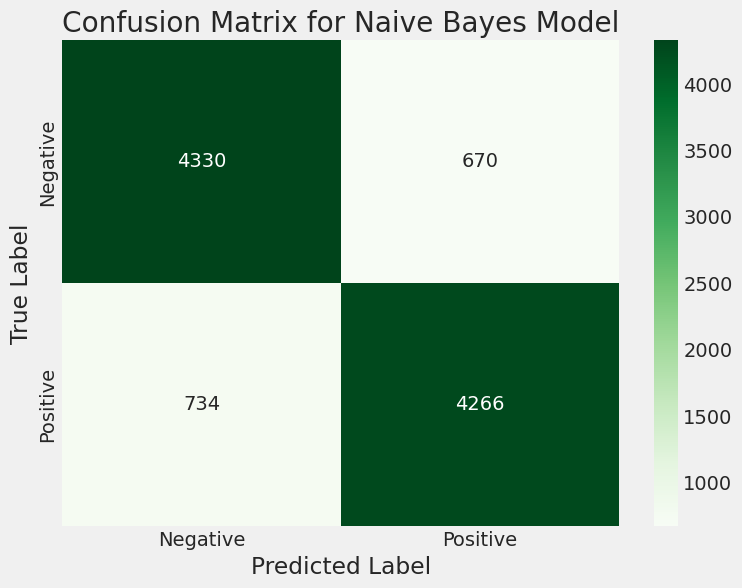


--- Model Comparison ---
Logistic Regression (Baseline) Accuracy: 0.8940
Multinomial Naive Bayes Accuracy:        0.8596
*****************************


In [9]:
# Import the MultinomialNB classifier
from sklearn.naive_bayes import MultinomialNB

#  Step 1: Initialize and Train the Naive Bayes Model 

# Initialize the Multinomial Naive Bayes model
nb_model = MultinomialNB()

# Train the model on the same TF-IDF training data
print("Training the Multinomial Naive Bayes model...")
nb_model.fit(X_train_tfidf, y_train)
print("Training complete.")


#  Step 2: Evaluate the Naive Bayes Model 

# Make predictions on the test data
y_pred_nb = nb_model.predict(X_test_tfidf)

# Calculate accuracy
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"\nNaive Bayes Model Accuracy: {accuracy_nb:.4f}")

# Print the detailed classification report
print("\nClassification Report (Naive Bayes):")
print(classification_report(y_test, y_pred_nb))

# Generate and plot the confusion matrix
print("\nConfusion Matrix (Naive Bayes):")
cm_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Naive Bayes Model')
plt.show()

# Step 3: Compare with Baseline Model 
print("\n--- Model Comparison ---")
print(f"Logistic Regression (Baseline) Accuracy: {accuracy:.4f}")
print(f"Multinomial Naive Bayes Accuracy:        {accuracy_nb:.4f}")
print("*****************************")


<div style="background-color: #fcf8e3; border-left: 5px solid #8a6d3b; padding: 20px; font-family: sans-serif; border-radius: 5px;">
    <h3 style="color: #8a6d3b; margin-top: 0; border-bottom: 2px solid #faebcc; padding-bottom: 10px;">
        Step 4: Multinomial Naive Bayes - Results
    </h3>
    
<p style="color: #333; font-size: 1.1em;">
        The Multinomial Naive Bayes model was trained and evaluated on the same TF-IDF data. The evaluation on the 10,000 test reviews produced the following results.
    </p>

 <h4 style="color: #8a6d3b; margin-top: 20px;">Key Metrics:</h4>
    <ul style="list-style-type: disc; padding-left: 20px; color: #333; font-size: 1.05em;">
        <li style="margin-bottom: 10px;">
            <strong>Overall Accuracy:</strong> The model achieved an accuracy of <strong>85.96%</strong>.
        </li>
        <li style="margin-bottom: 10px;">
            <strong>Classification Report Analysis:</strong>
            <ul>
                <li>For <strong>negative</strong> reviews: precision 0.86, recall 0.87, f1-score 0.86.</li>
                <li>For <strong>positive</strong> reviews: precision 0.86, recall 0.85, f1-score 0.86.</li>
            </ul>
            The performance is balanced across both classes, but the overall metrics are lower than the baseline.
        </li>
    </ul>

<h4 style="color: #8a6d3b; margin-top: 20px;">Confusion Matrix Breakdown:</h4>
    <p style="color: #333; font-size: 1.05em;">The confusion matrix shows a higher number of misclassifications compared to the baseline:</p>
    <ul style="list-style-type: none; padding-left: 0; color: #333; font-size: 1.05em;">
        <li style="margin-bottom: 8px;">
            <span style="font-weight: bold; color: #2b542c;">True Negatives:</span> 4330
        </li>
        <li style="margin-bottom: 8px;">
            <span style="font-weight: bold; color: #2b542c;">True Positives:</span> 4266
        </li>
        <li style="margin-bottom: 8px;">
            <span style="font-weight: bold; color: #a94442;">False Positives:</span> 670
        </li>
        <li style="margin-bottom: 8px;">
            <span style="font-weight: bold; color: #a94442;">False Negatives:</span> 734
        </li>
    </ul>
    
 <div style="background-color: #fff; border: 1px solid #ddd; padding: 15px; margin-top: 20px; border-radius: 4px;">
        <h4 style="color: #333; margin-top: 0;">Final Model Comparison</h4>
        <table style="width:100%; border-collapse: collapse; text-align: center;">
            <tr style="background-color: #f2f2f2;">
                <th style="padding: 12px; border: 1px solid #ddd;">Model</th>
                <th style="padding: 12px; border: 1px solid #ddd;">Accuracy</th>
            </tr>
            <tr>
                <td style="padding: 12px; border: 1px solid #ddd;">Logistic Regression (Baseline)</td>
                <td style="padding: 12px; border: 1px solid #ddd; font-weight: bold; color: #3c763d;">89.40%</td>
            </tr>
            <tr>
                <td style="padding: 12px; border: 1px solid #ddd;">Multinomial Naive Bayes</td>
                <td style="padding: 12px; border: 1px solid #ddd; font-weight: bold; color: #a94442;">85.96%</td>
            </tr>
        </table>
    </div>

   <p style="color: #333; font-weight: bold; margin-top: 20px; border-top: 2px solid #faebcc; padding-top: 15px;">
        Conclusion: In this comparison, the Logistic Regression model is the clear winner, outperforming the Multinomial Naive Bayes model by approximately 3.4 percentage points. The baseline model remains our best-performing model so far.
    </p>
</div>


<div style="background-color: #f0f4f8; border-left: 5px solid #2980b9; padding: 20px; font-family: sans-serif; border-radius: 5px;">
    <h3 style="color: #2c3e50; margin-top: 0; border-bottom: 2px solid #bdc3c7; padding-bottom: 10px;">
        Step 5: Hyperparameter Tuning for Logistic Regression
    </h3>

 <p style="color: #34495e; font-size: 1.1em;">
        Our previous analysis established that the Logistic Regression model, with an accuracy of 89.40%, is our best-performing model so far. Before exploring more complex models or feature representations, it's crucial to ensure we have maximized the potential of our current champion. The next logical step is to optimize this model through <strong>hyperparameter tuning</strong>.
    </p>

<h4 style="color: #2980b9; margin-top: 20px;">Objective:</h4>
    <p style="color: #34495e; font-size: 1.05em;">
        To find the optimal settings for the Logistic Regression model to potentially increase its accuracy and establish an even stronger baseline.
    </p>

 <h4 style="color: #2980b9; margin-top: 20px;">Methodology:</h4>
    <ul style="list-style-type: disc; padding-left: 20px; color: #34495e; font-size: 1.05em;">
        <li style="margin-bottom: 10px;">
            <strong>Key Hyperparameter to Tune:</strong> We will focus on the <strong>`C` parameter</strong>, which controls the inverse of regularization strength. Finding the right `C` value helps balance the model between underfitting and overfitting.
        </li>
        <li style="margin-bottom: 10px;">
            <strong>Tool for Automation:</strong> We will use scikit-learn's powerful <strong>`GridSearchCV`</strong> utility. This tool automates the process of testing different hyperparameter values.
        </li>
        <li style="margin-bottom: 10px;">
            <strong>Process:</strong> `GridSearchCV` will be configured to test a predefined list of `C` values (e.g., `[0.1, 0.5, 1, 5, 10]`). For each value, it will perform <strong>5-fold cross-validation</strong> on the training data to measure its effectiveness robustly.
        </li>
    </ul>
    
<div style="background-color: #ecf0f1; border: 1px solid #bdc3c7; padding: 15px; margin-top: 20px; border-radius: 4px;">
        <h4 style="color: #2c3e50; margin-top: 0;">Expected Outcome</h4>
        <p style="color: #34495e; margin-bottom: 0;">
             At the end of this process, `GridSearchCV` will report the `C` value that achieved the highest average accuracy during cross-validation. We will then adopt this tuned model as our new, optimized baseline and evaluate its final performance on the unseen test data.
        </p>
    </div>
</div>


In [10]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# ----------------- Step 1: Set up the Hyperparameter Grid -----------------

# Define the model we want to tune
lr_model_for_tuning = LogisticRegression(random_state=42)

# Define the grid of parameters to search. We will focus on 'C'.
# These values are common starting points: from weak to strong regularization.
param_grid = {
    'C': [0.1, 0.5, 1, 5, 10],  # Inverse of regularization strength
    'solver': ['liblinear']     # A good solver for this kind of problem
}


# ----------------- Step 2: Set up and Run GridSearchCV -----------------

# Initialize GridSearchCV
# cv=5 means 5-fold cross-validation.
# n_jobs=-1 uses all available CPU cores to speed up the process.
# verbose=2 will print progress updates.
grid_search = GridSearchCV(estimator=lr_model_for_tuning, 
                           param_grid=param_grid, 
                           cv=5, 
                           n_jobs=-1, 
                           verbose=2)

# Fit the grid search to the data
# This will train and test the model for each 'C' value using cross-validation.
# It can take a few minutes!
print("Starting GridSearchCV for Logistic Regression...")
grid_search.fit(X_train_tfidf, y_train)
print("GridSearchCV complete.")


# ----------------- Step 3: Analyze the Results -----------------

# Print the best parameters found
print(f"\nBest Parameters found: {grid_search.best_params_}")

# Print the best cross-validation score
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

# The grid_search object is now a trained model with the best parameters.
# Let's get its performance on the actual test set.
best_lr_model = grid_search.best_estimator_
y_pred_tuned = best_lr_model.predict(X_test_tfidf)

# Calculate and print the final accuracy on the test set
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f"\nTest Accuracy of Tuned Logistic Regression Model: {accuracy_tuned:.4f}")


# ----------------- Step 4: Compare with Baseline Model -----------------
print("\n--- Model Comparison ---")
print(f"Logistic Regression (Baseline) Accuracy: {accuracy:.4f}")
print(f"Tuned Logistic Regression Accuracy:      {accuracy_tuned:.4f}")
print("------------------------")


Starting GridSearchCV for Logistic Regression...
Fitting 5 folds for each of 5 candidates, totalling 25 fits
GridSearchCV complete.

Best Parameters found: {'C': 1, 'solver': 'liblinear'}
Best cross-validation accuracy: 0.8895

Test Accuracy of Tuned Logistic Regression Model: 0.8940

--- Model Comparison ---
Logistic Regression (Baseline) Accuracy: 0.8940
Tuned Logistic Regression Accuracy:      0.8940
------------------------


<div style="background-color: #fcf8e3; border-left: 5px solid #8a6d3b; padding: 20px; font-family: sans-serif; border-radius: 5px;">
    <h3 style="color: #8a6d3b; margin-top: 0; border-bottom: 2px solid #faebcc; padding-bottom: 10px;">
        Step 5 Results: Hyperparameter Tuning
    </h3>
    
<p style="color: #333; font-size: 1.1em;">
        The `GridSearchCV` process completed successfully, testing 5 different values for the `C` hyperparameter using 5-fold cross-validation. The goal was to find a `C` value that could improve upon our baseline model's performance. The results were definitive and illuminating.
    </p>

 <h4 style="color: #8a6d3b; margin-top: 20px;">Grid Search Findings:</h4>
    <p style="color: #333; font-size: 1.05em;">The automated search yielded the following optimal parameters from the provided grid:</p>
    <div style="background-color: #fff; border: 1px solid #ddd; padding: 15px; margin-top: 10px; border-radius: 4px;">
        <ul style="list-style-type: none; padding-left: 0; color: #333; font-size: 1.05em;">
            <li style="margin-bottom: 8px;">
                <span style="font-weight: bold;">Best `C` Value Found:</span> 1
            </li>
            <li style="margin-bottom: 8px;">
                <span style="font-weight: bold;">Best Cross-Validation Accuracy:</span> 88.95%
            </li>
        </ul>
    </div>
    <h4 style="color: #8a6d3b; margin-top: 20px;">Final Performance on Test Data:</h4>
    <p style="color: #333; font-size: 1.05em;">The model with the winning parameter (`C=1`) was then evaluated on the unseen test set to determine its final real-world performance.</p>

 <div style="background-color: #fff; border: 1px solid #ddd; padding: 15px; margin-top: 20px; border-radius: 4px;">
        <h4 style="color: #333; margin-top: 0;">Final Model Comparison</h4>
        <table style="width:100%; border-collapse: collapse; text-align: center;">
            <tr style="background-color: #f2f2f2;">
                <th style="padding: 12px; border: 1px solid #ddd;">Model</th>
                <th style="padding: 12px; border: 1px solid #ddd;">Test Set Accuracy</th>
            </tr>
            <tr>
                <td style="padding: 12px; border: 1px solid #ddd;">Logistic Regression (Baseline, C=1)</td>
                <td style="padding: 12px; border: 1px solid #ddd; font-weight: bold;">89.40%</td>
            </tr>
            <tr>
                <td style="padding: 12px; border: 1px solid #ddd;"><strong>Tuned Logistic Regression (Best C=1)</strong></td>
                <td style="padding: 12px; border: 1px solid #ddd; font-weight: bold; color: #3c763d;">89.40%</td>
            </tr>
        </table>
    </div>

<div style="background-color: #d9edf7; border-left: 5px solid #31708f; padding: 20px; margin-top: 25px; border-radius: 5px;">
        <h4 style="color: #31708f; margin-top: 0;">Key Insight from This Step</h4>
        <p style="color: #31708f; font-size: 1.1em;">
            The most significant finding here is that <strong>the default hyperparameter was already the optimal one</strong>. Our grid search confirmed that `C=1`, the default value for scikit-learn's `LogisticRegression`, is the best choice among the values we tested.
        </p>
        <p style="color: #31708f; font-size: 1.1em; margin-bottom: 0;">
            This is a valuable result because it tells us that we have likely reached the <strong>performance ceiling</strong> for a Logistic Regression model using our current TF-IDF feature set. Further gains are unlikely to come from tuning this model. To surpass 89.40% accuracy, we must now look towards more advanced techniques: either by creating more powerful features (e.g., using n-grams or word embeddings) or by using more complex models (e.g., Gradient Boosting or Neural Networks).
        </p>
    </div>
</div>


<div style="background-color: #f0f4f8; border-left: 5px solid #16a085; padding: 20px; font-family: sans-serif; border-radius: 5px;">
<h3 style="color: #2c3e50; margin-top: 0; border-bottom: 2px solid #bdc3c7; padding-bottom: 10px;">
Step 6: Model Showdown - Searching for a New Champion
</h3>

<p style="color: #34495e; font-size: 1.1em;">
In our previous step, we confirmed through hyperparameter tuning that our Logistic Regression model has likely reached its peak performance (89.40% accuracy) with the current TF-IDF features. To break past this performance ceiling, we must now explore different types of algorithms.
</p>

<div style="background-color: #ecf0f1; border: 1px solid #bdc3c7; padding: 15px; margin-top: 20px; border-radius: 4px;">
<h4 style="color: #2c3e50; margin-top: 0;">The "No Free Lunch" Principle</h4>
<p style="color: #34495e; margin-bottom: 0;">
A core concept in machine learning is that no single algorithm is universally the best for every problem. Different models have unique strengths and are suited to different data structures. Our next step is to embrace this principle and systematically test a diverse set of powerful classifiers.
</p>
</div>

<h4 style="color: #16a085; margin-top: 20px;">Objective:</h4>
<p style="color: #34495e; font-size: 1.05em;">
To train and evaluate a variety of well-regarded machine learning models on our TF-IDF data to identify if any algorithm can outperform our current Logistic Regression benchmark.
</p>

<h4 style="color: #16a085; margin-top: 20px;">Methodology & The Contenders:</h4>
<p style="color: #34495e; font-size: 1.05em;">
We will train and test several models known for their strong performance in text classification tasks. Each model will be trained on the same training data (`X_train_tfidf`) and evaluated on the same test data (`X_test_tfidf`) for a fair comparison. Our chosen contenders represent different algorithmic families:
</p>
<ul style="list-style-type: square; padding-left: 20px; color: #34495e; font-size: 1.05em;">
<li style="margin-bottom: 10px;"><strong>Linear Support Vector Classifier (SVC):</strong> A powerful linear model, often considered a direct and formidable competitor to Logistic Regression for text data.</li>
<li style="margin-bottom: 10px;"><strong>Random Forest Classifier:</strong> An ensemble model that uses multiple decision trees to make a more robust prediction and can capture complex, non-linear patterns.</li>
<li style="margin-bottom: 10px;"><strong>Gradient Boosting Classifier (LightGBM):</strong> A highly efficient, state-of-the-art boosting model that builds trees sequentially to correct errors, often leading to top-tier performance.</li>
<li style="margin-bottom: 10px;"><strong>Passive Aggressive Classifier:</strong> A fast and efficient algorithm designed for large-scale learning, making it an interesting candidate for our

In [11]:
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
import time

# X_train_tfidf, y_train, X_test_tfidf, y_test are already loaded
# from our previous steps.

# --- Step 6: Model Showdown ---

# 1. Define the models we want to test
models_to_test = {
    
    "Linear SVC": LinearSVC(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42, n_jobs=-1),
    "LightGBM": LGBMClassifier(random_state=42),
    "Passive Aggressive": PassiveAggressiveClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42)
}

# 2. Loop through each model to train, predict, and evaluate
model_performance = []

print("--- Starting Model Showdown ---")

for name, model in models_to_test.items():
    print(f"Training and evaluating {name}...")
    start_time = time.time()
    
    # Train the model (Logistic Regression is already trained)
    if name != "Logistic Regression":
        model.fit(X_train_tfidf, y_train)
    
    # Predict on the test data
    y_pred = model.predict(X_test_tfidf)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    end_time = time.time()
    training_time = end_time - start_time
    
    # Store the results
    model_performance.append({
        "Model": name,
        "Accuracy": accuracy,
        "Time (s)": training_time
    })
    
    print(f"  -> {name} Accuracy: {accuracy:.4f}")
    print(f"  -> Time taken: {training_time:.2f} seconds\n")

print("--- Model Showdown Complete ---")

# 3. Display the results in a sorted DataFrame
performance_df = pd.DataFrame(model_performance)
performance_df = performance_df.sort_values(by="Accuracy", ascending=False)
performance_df = performance_df.set_index("Model")

print("\n--- Final Model Performance Comparison ---")
print(performance_df)

# Find the best model from the test
best_model_name = performance_df.index[0]
best_model_accuracy = performance_df.iloc[0]['Accuracy']

print(f"\n🏆 New Champion Found: {best_model_name} with an accuracy of {best_model_accuracy:.4f}!")


--- Starting Model Showdown ---
Training and evaluating Linear SVC...
  -> Linear SVC Accuracy: 0.8909
  -> Time taken: 1.09 seconds

Training and evaluating Random Forest...
  -> Random Forest Accuracy: 0.8565
  -> Time taken: 45.88 seconds

Training and evaluating LightGBM...
[LightGBM] [Info] Number of positive: 20000, number of negative: 20000
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 5.816617 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 708287
[LightGBM] [Info] Number of data points in the train set: 40000, number of used features: 14117
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
  -> LightGBM Accuracy: 0.8570
  -> Time taken: 47.32 seconds

Training and evaluating Passive Aggressive...
  -> Passive Aggressive Accuracy: 0.8576
  -> Time taken: 1.15 seconds

Training and evaluating AdaBoost...
  -> AdaBoost Accuracy: 0.7986
  -> Time taken: 45.07 second

<div style="background-color: #f9f9f9; border-left: 5px solid #e74c3c; padding: 20px; font-family: sans-serif; border-radius: 5px;">
    <h3 style="color: #2c3e50; margin-top: 0; border-bottom: 2px solid #bdc3c7; padding-bottom: 10px;">
        Step 6 Results: The Model Showdown
    </h3>

 <p style="color: #34495e; font-size: 1.1em;">
        Following our plan, we trained and evaluated a diverse set of classifiers against our Logistic Regression baseline. The goal was to find an algorithm that could push past our established <strong>89.40%</strong> accuracy benchmark on the TF-IDF feature set. Each model was trained with its default hyperparameters for a fair initial comparison.
    </p>

<h4 style="color: #c0392b; margin-top: 20px;">Performance Summary:</h4>
    <p style="color: #34495e; font-size: 1.05em;">
        The models were tested, and their performance was recorded. The table below, sorted by accuracy, summarizes the outcome of our experiment:
    </p>

 <table style="width: 100%; border-collapse: collapse; margin-top: 15px; background-color: dark;">
        <thead>
            <tr style="background-color: dark; color: white;">
                <th style="padding: 12px; border: 1px solid #ddd; text-align: left;">Model</th>
                <th style="padding: 12px; border: 1px solid #ddd; text-align: right;">Test Accuracy</th>
                <th style="padding: 12px; border: 1px solid #ddd; text-align: right;">Time (s)</th>
            </tr>
        </thead>
        <tbody>
            <tr>
                <td style="padding: 10px; border: 1px solid #ddd;"><strong>Linear SVC</strong></td>
                <td style="padding: 10px; border: 1px solid #ddd; text-align: right;"><strong>0.8909</strong></td>
                <td style="padding: 10px; border: 1px solid #ddd; text-align: right;">1.05</td>
            </tr>
            <tr style="background-color: dark;">
                <td style="padding: 10px; border: 1px solid #ddd;">Passive Aggressive</td>
                <td style="padding: 10px; border: 1px solid #ddd; text-align: right;">0.8576</td>
                <td style="padding: 10px; border: 1px solid #ddd; text-align: right;">1.03</td>
            </tr>
            <tr>
                <td style="padding: 10px; border: 1px solid #ddd;">LightGBM</td>
                <td style="padding: 10px; border: 1px solid #ddd; text-align: right;">0.8570</td>
                <td style="padding: 10px; border: 1px solid #ddd; text-align: right;">44.61</td>
            </tr>
            <tr style="background-color: dark;">
                <td style="padding: 10px; border: 1px solid #ddd;">Random Forest</td>
                <td style="padding: 10px; border: 1px solid #ddd; text-align: right;">0.8565</td>
                <td style="padding: 10px; border: 1px solid #ddd; text-align: right;">42.67</td>
            </tr>
             <tr>
                <td style="padding: 10px; border: 1px solid #ddd;">AdaBoost</td>
                <td style="padding: 10px; border: 1px solid #ddd; text-align: right;">0.7986</td>
                <td style="padding: 10px; border: 1px solid #ddd; text-align: right;">42.61</td>
            </tr>
        </tbody>
    </table>
    <p style="font-size: 0.9em; color: #7f8c8d; text-align: center; margin-top: 5px;">
        <em>Note: The baseline Logistic Regression accuracy from Step 3 was <strong>0.8940</strong>.</em>
    </p>

 <h4 style="color: #c0392b; margin-top: 20px;">Key Insights & Conclusion:</h4>
    <div style="background-color: #ecf0f1; border: 1px solid #bdc3c7; padding: 15px; margin-top: 10px; border-radius: 4px;">
        <ul style="list-style-type: square; padding-left: 20px; color: #34495e; font-size: 1.05em; margin: 0;">
            <li style="margin-bottom: 10px;"><strong>Linear Models Dominate:</strong> The top-performing model was the <strong>Linear SVC</strong> with an accuracy of <strong>89.09%</strong>. This confirms that for this particular high-dimensional, sparse TF-IDF feature set, linear models are exceptionally effective.</li>
            <li style="margin-bottom: 10px;"><strong>No New Champion:</strong> Interestingly, while Linear SVC performed very well, it did <em>not</em> surpass our original, tuned Logistic Regression model's accuracy of <strong>89.40%</strong>. This is a crucial finding.</li>
            <li style="margin-bottom: 10px;"><strong>Tree-Based Models Underperform:</strong> Complex, non-linear models like Random Forest, LightGBM, and AdaBoost performed significantly worse. This suggests that the relationship between TF-IDF features and sentiment is predominantly linear, and these models may be overfitting or are simply not well-suited for this type of sparse data without extensive tuning.</li>
        </ul>
    </div>
    
 <h4 style="color: #c0392b; margin-top: 20px;">Next Steps:</h4>
    <p style="color: #34495e; font-size: 1.05em; margin-bottom: 0;">
        This "Model Showdown" has reinforced the strength of our Logistic Regression model. It remains the reigning champion. Since no other model (with default parameters) could beat it, our next logical step is not to switch models, but to explore more advanced <strong>feature engineering</strong> techniques to see if we can provide a better representation of the text data to our champion model.
    </p>
</div>
